In [2]:
import pandas as pd
import numpy as np
import video.df as df
from video import vid
from video import df
from video import frame

import video.reader as r
import cv2 as cv
from video.reader import VideoReader


from typing import List, Union
from numpy.typing import ArrayLike


## Masking by Red Color.
As red color is a hazard for seizures, we'll mask by the red color, and count how many pixels are red per frame. If red pixels cover more than 25% of the screen we mark that frame as potentially dangerous.

In [3]:
v = df.get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')

In [4]:
v.head()

hue  lightness  saturation
frame y x                            
0     0 0    0         36           0
        1    0         32           0
        2    0         31           0
        3   30         30          22
        4   30         29          22

In [6]:
v.lightness.max()

255

In [21]:
v.values

array([[  0,  36,   0],
       [  0,  32,   0],
       [  0,  31,   0],
       ...,
       [113,  30,  73],
       [114,  42,  58],
       [114,  42,  58]], dtype=uint8)

In [73]:
def get_red_mask(img):
    # mask for hue below 10 hue, lightness, saturation
    lb = np.array([0,50,50], dtype=np.uint8)
    ub = np.array([10,255,255], dtype=np.uint8)
    mask1 = cv.inRange(img, lb, ub)

    # # mask for hue above 340
    lb1 = np.array([170,50, 50], dtype=np.uint8)
    ub1 = np.array([180,255, 255], dtype=np.uint8)
    mask2 = cv.inRange(img, lb1, ub1)

    return mask1 | mask2
    

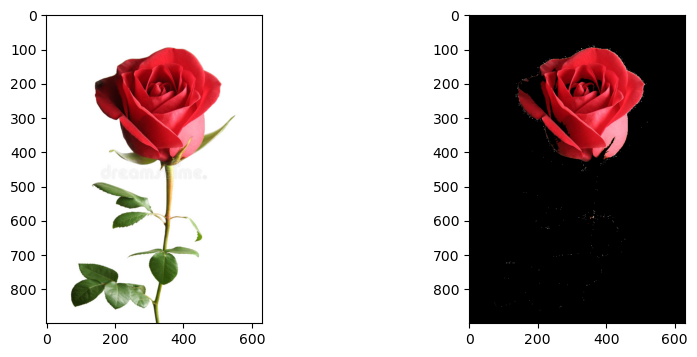

In [79]:
# check how red mask works with control image
im = cv.imread('video/red-rose.jpeg')
im_hls = cv.cvtColor(im, cv.COLOR_BGR2HLS)
m = cv.bitwise_and(im_hls, im_hls, mask=red_mask(im_hls))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.imshow(cv.cvtColor(m, cv.COLOR_HLS2RGB))

In [32]:
def add_red_mask(df: pd.DataFrame) -> pd.DataFrame:
    '''
    calls get_frame() to generate mask for each frame. s
    aves results in np.array of 1 and 0
    where 1 - light pixel, 0 - dark pixel
    '''
    # let's try the same but through numpy array
    narr = np.empty((0,), dtype=np.uint8)
    w = df.attrs['width']
    h = df.attrs['height']
    # loop through the frames
    for f in df.index.levels[0]:
        # save an image to the variable 'frame'
        frame = df.loc[f].iloc[:, :].to_numpy().reshape(w, h, 3)
        # get the mask
        mask = red_mask(frame)
        narr = np.concatenate([narr, mask.reshape(-1)])
    return df.assign(red_values=narr)

In [81]:
add_red_mask(v).red_values.unique()

array([  0, 255], dtype=uint8)

In [82]:
from importlib import reload

In [101]:
reload(df)

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

In [120]:
v = df.get_exploration_df('videos/Banned Pokemon Seizure Scene.mp4')

In [100]:
v.red_values.unique()

array([0, 1], dtype=uint8)

In [102]:
agg_v = df.get_aggregated_df(v)

In [103]:
agg_v

,lightness,hue,saturation,masked_values,red_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,,
0,100.2272,93.4756,92.2620,410,329,NaN,NaN,NaN,NaN
1,100.2240,93.5696,92.3860,410,327,0.0032,-0.0940,-0.1240,0.0
2,100.1988,93.5936,92.4784,410,327,0.0252,-0.0240,-0.0924,0.0
3,100.1748,93.3900,92.5784,410,326,0.0240,0.2036,-0.1000,0.0
4,100.1360,93.2316,92.8124,410,326,0.0388,0.1584,-0.2340,0.0
...,...,...,...,...,...,...,...,...,...
780,43.2972,113.7720,61.5488,28,0,0.0132,-0.0464,-0.0540,0.0
781,43.7956,113.9872,58.9844,28,0,-0.4984,-0.2152,2.5644,0.0
782,43.7660,113.9804,58.8628,28,0,0.0296,0.0068,0.1216,0.0


<Axes: xlabel='frame'>

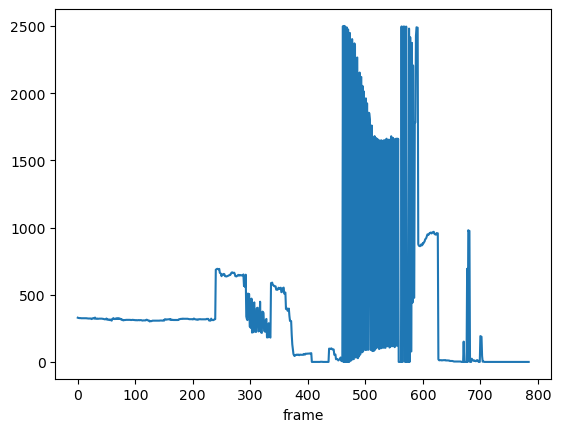

In [104]:
agg_v.red_values.plot()

<Axes: xlabel='frame'>

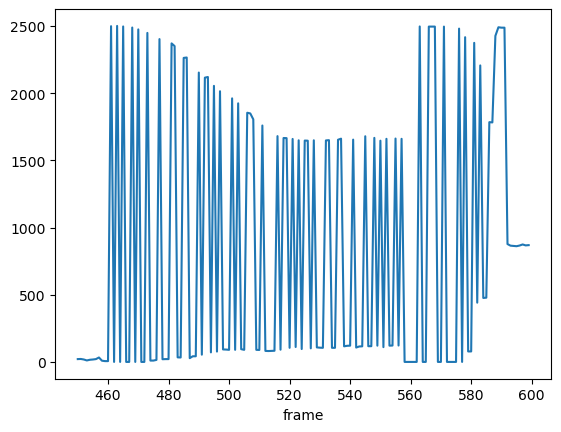

In [106]:
agg_v.red_values[450:600].plot()

In [107]:
rs = df.get_exploration_df('videos/Red Spin.mp4')

In [108]:
agg_rs = df.get_aggregated_df(rs)

<Axes: xlabel='frame'>

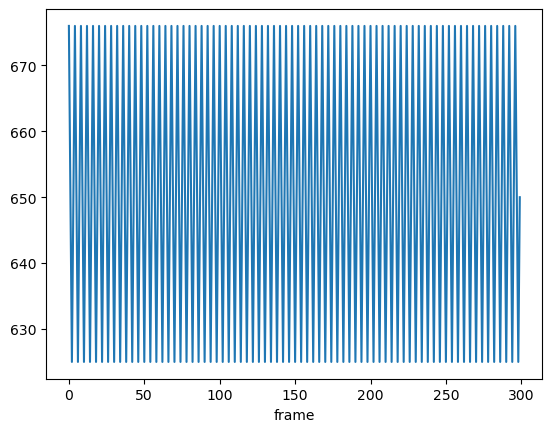

In [109]:
agg_rs.red_values.plot()

In [110]:
safe = df.get_exploration_df('videos/Learn A To Z Insects For Kindergarten  A to Z  Learning Video  A To Z Reading  The Little Lumen.mp4')

In [111]:
agg_safe = df.get_aggregated_df(safe)

<Axes: xlabel='frame'>

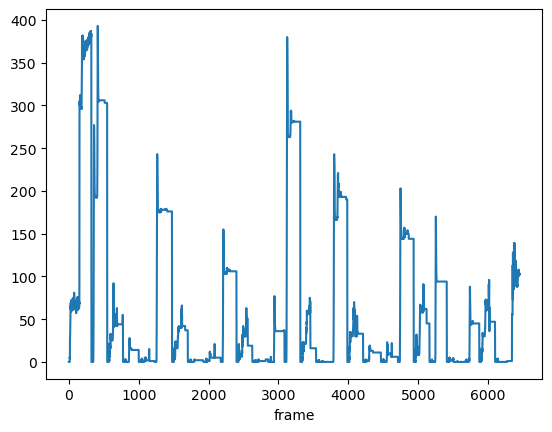

In [114]:
# max value is only 393!
agg_safe.red_values.plot()

In [115]:
agg_v.head()

,lightness,hue,saturation,masked_values,red_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,,
0,100.2272,93.4756,92.2620,410,329,NaN,NaN,NaN,NaN
1,100.2240,93.5696,92.3860,410,327,0.0032,-0.0940,-0.1240,0.0
2,100.1988,93.5936,92.4784,410,327,0.0252,-0.0240,-0.0924,0.0
3,100.1748,93.3900,92.5784,410,326,0.0240,0.2036,-0.1000,0.0
4,100.1360,93.2316,92.8124,410,326,0.0388,0.1584,-0.2340,0.0


In [121]:
v.head()

hue  lightness  saturation  masked_values  red_values  seconds
frame y x                                                                
0     0 0    0         36           0              0           0        0
        1    0         32           0              0           0        0
        2    0         31           0              0           0        0
        3   30         30          22              0           0        0
        4   30         29          22              0           0        0

In [127]:
v.index.levels[2]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64', name='x')

In [129]:
width = len(v.index.levels[2])
height = len(v.index.levels[1])
frames = len(v.index.levels[0])

frames, width, height

(785, 50, 50)

In [133]:
agg_v.attrs['width'] = width

In [144]:
total_pixels_per_frame = agg_v.attrs['width'] * agg_v.attrs['height']

In [146]:
summ = 0
total_pixels_per_frame = agg_v.attrs['width'] * agg_v.attrs['height']
for red_value in agg_v.red_values:
    if red_value > total_pixels_per_frame / 4:
        summ += 1

In [147]:
summ

145

In [149]:
# safe video
summ = 0
total_pixels_per_frame = agg_safe.attrs['width'] * agg_safe.attrs['height']
for red_value in agg_safe.red_values:
    if red_value > total_pixels_per_frame / 4:
        summ += 1
summ

0

In [150]:
# red spin video
summ = 0
total_pixels_per_frame = agg_rs.attrs['width'] * agg_rs.attrs['height']
for red_value in agg_rs.red_values:
    if red_value > total_pixels_per_frame / 4:
        summ += 1
summ

225

In [151]:
agg_rs.shape[0] # out of 300 frames 255 are dangerous

300